In [67]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [68]:
# Read in and grayscale the image
image = mpimg.imread('exit-ramp.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

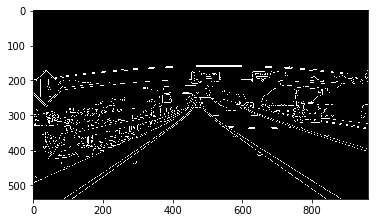

In [86]:
# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define out parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
plt.imshow(edges, cmap='Greys_r')

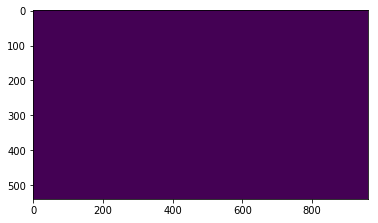

In [77]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges) # edges 크기만큼 0행렬을 mask 변수에 저장
plt.imshow(mask)
ignore_mask_color = 255

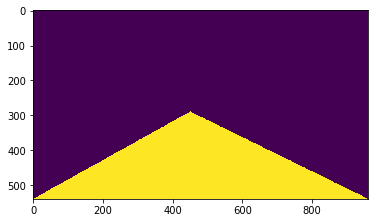

In [88]:
# This time we are defining a four sided polygon to mask
vertices = np.array([[(0,540),(450, 290),(450, 290),(960,539)]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)# vertices 영역만큼의 Polygon 형상에만 255의 값을 넣습니다
plt.imshow(mask)

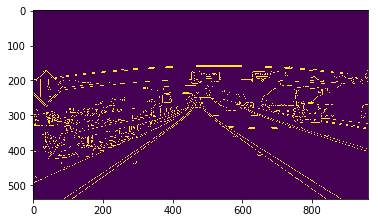

In [90]:
plt.imshow(edges)

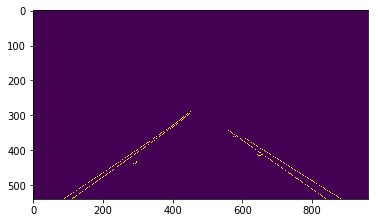

In [89]:
masked_edges = cv2.bitwise_and(edges, mask)    # edge와 mask 변수를 and (비트연산) 해서 나온 값들을 masked에 넣고 반환합니다
plt.imshow(masked_edges)

In [81]:
# Define the Hough transform parameters
# Mask a blank the same size our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = np.pi/180    # angular resolution in radians of the Hough grid
threshold = 15       # minimum number of votes (intersections in Hough grid cell)
min_line_length = 40 # minimum number of pixels making up a line
max_line_gap = 20    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)
print(lines)

[[[557 342 838 539]]

 [[111 538 348 372]]

 [[609 368 881 538]]

 [[ 89 539 442 301]]

 [[608 367 880 537]]

 [[395 338 442 294]]

 [[307 400 349 371]]

 [[398 336 449 293]]

 [[113 539 233 454]]

 [[ 99 532 144 501]]

 [[350 369 423 317]]

 [[793 506 835 536]]

 [[318 386 381 341]]

 [[616 384 659 414]]

 [[763 485 819 525]]

 [[360 362 406 330]]

 [[223 450 265 440]]]


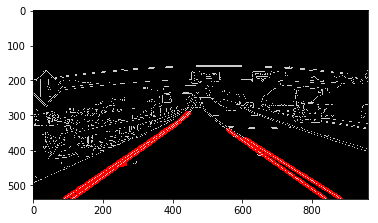

In [87]:
# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges))
# Draw the lines on the edge image
lines_edges = cv2.addWeighted(color_edges, 0.8, line_image,1,0)
plt.imshow(lines_edges)